In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
twenty_year_MR = pd.read_csv("resources/ 20-Year Treasury Constant Maturity Rate.csv", parse_dates = True, index_col="DATE")

In [3]:
twenty_year_MR = twenty_year_MR[twenty_year_MR["DGS20"] != "."]

In [4]:
twenty_year_MR["20 year MR"] = pd.to_numeric(twenty_year_MR["DGS20"])

In [5]:
twenty_year_MR.drop("DGS20", inplace=True, axis=1)

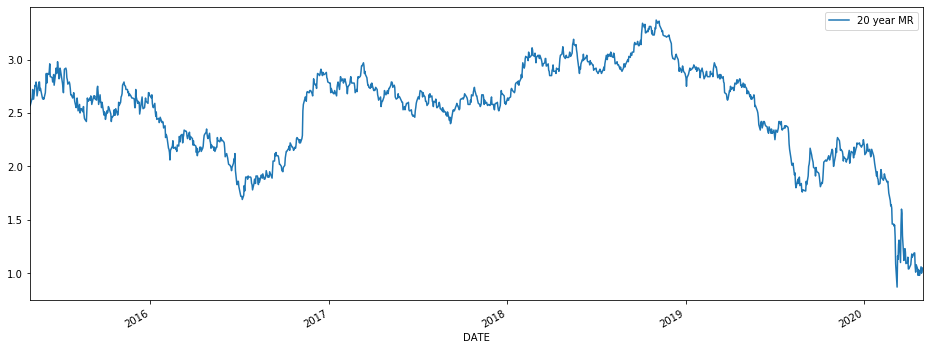

In [6]:
twenty_year_MR.plot(figsize = (16,6))

In [7]:
thirty_year = pd.read_csv("resources/ 30-Year Treasury Constant Maturity Rate.csv", parse_dates = True, index_col="DATE")

In [8]:
thirty_year_MR = thirty_year[thirty_year["DGS30"] != "."].apply(lambda x: pd.to_numeric(x))

In [9]:
thirty_year_MR.columns = ["30 year MR"]

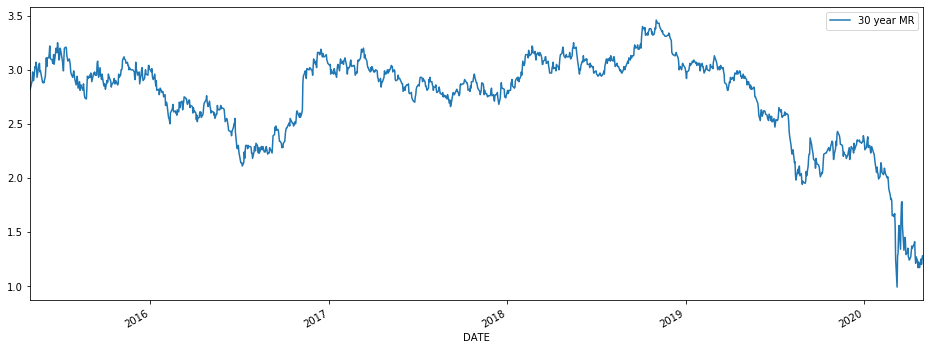

In [10]:
thirty_year_MR.plot(figsize = (16,6))

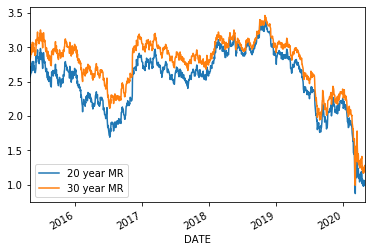

In [11]:
ax = twenty_year_MR.plot()
thirty_year_MR.plot(ax = ax)

### lets bing in the s & P, VIX 

In [12]:
tickers = ["^GSPC", "UVXY"]

In [13]:
data = pd.DataFrame()

In [14]:
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start ="2015-05-01", end = "2020-05-01")['Adj Close']

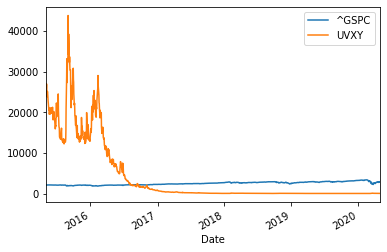

In [15]:
data.plot()

In [16]:
aaa= pd.read_csv("resources/ ICE BofA AAA US Corporate Index Effective Yield.csv",parse_dates =True, index_col="DATE")

In [17]:
aaa.columns = ["BofA AAA US Yield"]

In [18]:
aaa = aaa[aaa["BofA AAA US Yield"] != "."].apply(lambda x: pd.to_numeric(x))

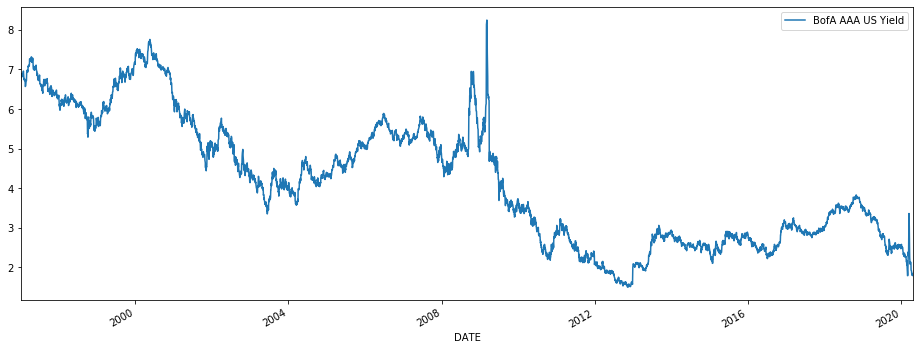

In [19]:
aaa.plot(figsize = (16,6))

In [20]:
bbb = pd.read_csv("resources/ICE BofA BBB US Corporate Index Effective Yield .csv", index_col="DATE", parse_dates = True)

In [21]:
bbb.columns = ["BBB US Coporate Index"]

In [22]:
bbb = bbb[bbb["BBB US Coporate Index"] != "."].apply(lambda x: pd.to_numeric(x))

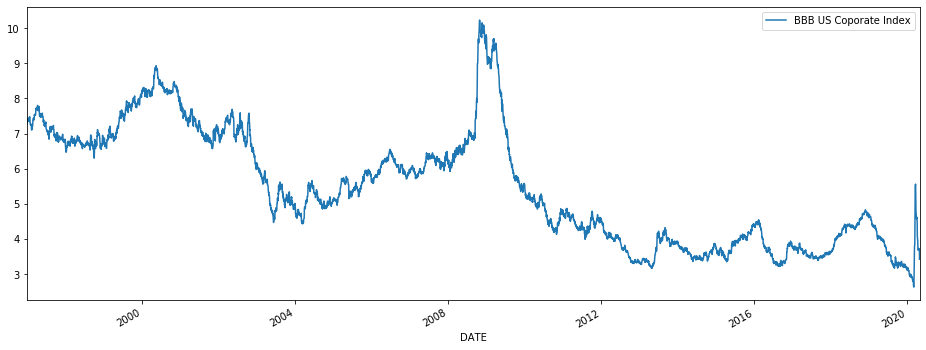

In [23]:
bbb.plot(figsize = (16,6))

In [24]:
euro_us = pd.read_csv("resources/U.S. : Euro Foreign Exchange Rate.csv", index_col="DATE", parse_dates = True)

In [25]:
euro_us = euro_us[euro_us["DEXUSEU"] != "."].apply(lambda x: pd.to_numeric(x))

In [26]:
euro_us.columns = ["US/EU Ex Rate"]

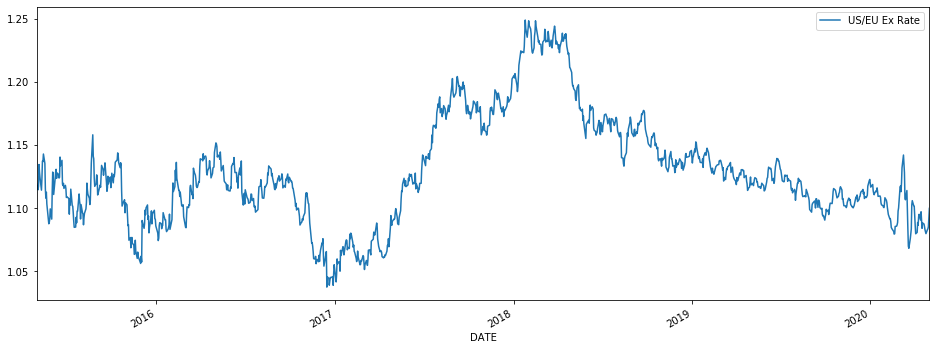

In [27]:
euro_us.plot(figsize = (16,6))

In [28]:
data = pd.concat([twenty_year_MR, thirty_year_MR, data,aaa,bbb, euro_us ], axis = 1)

In [29]:
data.corr()

,20 year MR,30 year MR,^GSPC,UVXY,BofA AAA US Yield,BBB US Coporate Index,US/EU Ex Rate
20 year MR,1.000000,0.973658,-0.010501,-0.003720,0.902922,0.541484,0.362284
30 year MR,0.973658,1.000000,-0.213497,0.138153,0.815718,0.522766,0.272491
^GSPC,-0.010501,-0.213497,1.000000,-0.683233,0.205611,-0.165954,0.270006
UVXY,-0.003720,0.138153,-0.683233,1.000000,-0.255532,0.199102,-0.220563
BofA AAA US Yield,0.902922,0.815718,0.205611,-0.255532,1.000000,0.909900,0.417478
BBB US Coporate Index,0.541484,0.522766,-0.165954,0.199102,0.909900,1.000000,0.148922
US/EU Ex Rate,0.362284,0.272491,0.270006,-0.220563,0.417478,0.148922,1.000000


# returns

In [30]:
data

,20 year MR,30 year MR,^GSPC,UVXY,BofA AAA US Yield,BBB US Coporate Index,US/EU Ex Rate
1996-12-31,NaN,NaN,NaN,NaN,6.72,7.26,NaN
1997-01-02,NaN,NaN,NaN,NaN,6.80,7.36,NaN
1997-01-03,NaN,NaN,NaN,NaN,6.80,7.34,NaN
1997-01-06,NaN,NaN,NaN,NaN,6.80,7.37,NaN
1997-01-07,NaN,NaN,NaN,NaN,6.82,7.39,NaN
...,...,...,...,...,...,...,...
2020-04-27,1.06,1.25,2878.479980,43.099998,1.84,3.72,1.0829
2020-04-28,1.00,1.20,2863.389893,44.180000,1.81,3.67,1.0836
2020-04-29,1.02,1.24,2939.510010,40.119999,1.81,3.64,1.0853
2020-04-30,1.05,1.28,2912.429932,41.930000,1.84,3.42,1.0934


In [31]:
for t in data.columns:
    data[f"{t} daily returns"] = data[f"{t}"].pct_change()

In [33]:
data.corr()

,20 year MR,30 year MR,^GSPC,UVXY,BofA AAA US Yield,BBB US Coporate Index,US/EU Ex Rate,20 year MR daily returns,30 year MR daily returns,^GSPC daily returns,UVXY daily returns,BofA AAA US Yield daily returns,BBB US Coporate Index daily returns,US/EU Ex Rate daily returns
20 year MR,1.000000,0.973658,-0.010501,-0.003720,0.902922,0.541484,0.362284,0.076273,0.077001,0.019184,-0.039477,0.079698,0.034350,-0.026525
30 year MR,0.973658,1.000000,-0.213497,0.138153,0.815718,0.522766,0.272491,0.079424,0.082379,0.023926,-0.053502,0.082705,0.026901,-0.024628
^GSPC,-0.010501,-0.213497,1.000000,-0.683233,0.205611,-0.165954,0.270006,-0.011346,-0.013092,0.037747,0.007279,-0.030367,-0.044578,-0.006576
UVXY,-0.003720,0.138153,-0.683233,1.000000,-0.255532,0.199102,-0.220563,-0.003393,0.004431,-0.031944,0.045739,0.001816,0.015676,0.010691
BofA AAA US Yield,0.902922,0.815718,0.205611,-0.255532,1.000000,0.909900,0.417478,0.047165,0.047842,0.005682,-0.022308,0.018863,0.032589,-0.032435
BBB US Coporate Index,0.541484,0.522766,-0.165954,0.199102,0.909900,1.000000,0.148922,0.027822,0.032628,0.033718,-0.024922,-0.001802,0.016990,-0.035360
US/EU Ex Rate,0.362284,0.272491,0.270006,-0.220563,0.417478,0.148922,1.000000,0.024210,0.023182,-0.005855,0.032978,0.028421,0.030072,0.067514
20 year MR daily returns,0.076273,0.079424,-0.011346,-0.003393,0.047165,0.027822,0.024210,1.000000,0.978703,0.424376,-0.272576,0.721114,0.519019,-0.133081
30 year MR daily returns,0.077001,0.082379,-0.013092,0.004431,0.047842,0.032628,0.023182,0.978703,1.000000,0.409803,-0.268187,0.707749,0.497979,-0.128016
^GSPC daily returns,0.019184,0.023926,0.037747,-0.031944,0.005682,0.033718,-0.005855,0.424376,0.409803,1.000000,-0.748921,0.121302,-0.016737,-0.044241


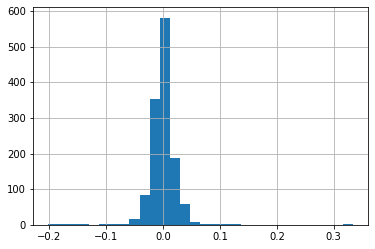

In [35]:
data["20 year MR daily returns"].hist(bins = 30)

In [58]:
data[data["20 year MR daily returns"] * 100 > 9]

,20 year MR,30 year MR,^GSPC,UVXY,BofA AAA US Yield,BBB US Coporate Index,US/EU Ex Rate,20 year MR daily returns,30 year MR daily returns,^GSPC daily returns,UVXY daily returns,BofA AAA US Yield daily returns,BBB US Coporate Index daily returns,US/EU Ex Rate daily returns
2016-11-09,2.52,2.88,2163.260010,1355.000000,2.82,3.59,1.0952,0.100437,0.095057,0.011077,-0.050456,0.060150,0.040580,-0.007432
2020-03-10,1.16,1.28,2882.229980,40.450001,1.98,3.17,1.1342,0.333333,0.292929,0.049396,-0.116233,0.106145,0.074576,-0.006830
2020-03-12,1.27,1.49,2480.639893,65.019997,2.27,3.63,1.1081,0.123894,0.146154,-0.095113,0.348403,0.101942,0.096677,-0.017642
2020-03-17,1.45,1.63,2529.189941,87.230003,2.58,4.27,1.0971,0.318182,0.216418,0.059955,-0.032283,0.131579,0.106218,-0.015082
2020-03-18,1.60,1.77,2398.100098,110.629997,2.96,4.82,1.0833,0.103448,0.085890,-0.051831,0.268256,0.147287,0.128806,-0.012579


## 2016-11-09	

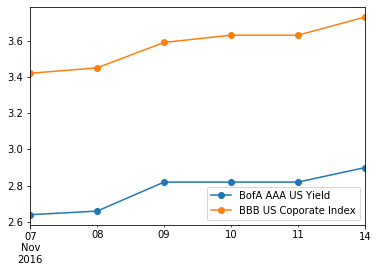

In [67]:
data[["BofA AAA US Yield","BBB US Coporate Index"]].loc["2016-11-06":"2016-11-14"].plot(marker ="o")

### 2020-03-10

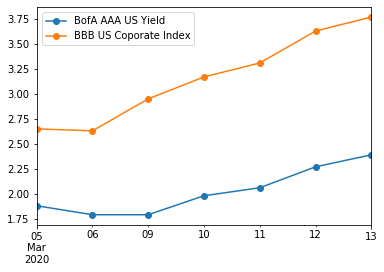

In [70]:
data[["BofA AAA US Yield","BBB US Coporate Index"]].loc["2020-03-5":"2020-03-15"].plot(marker ="o")

### 2020-03-12

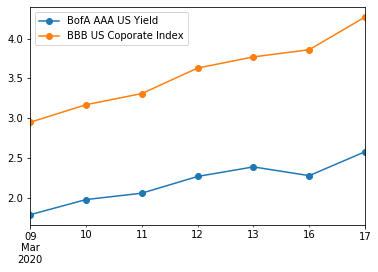

In [72]:
data[["BofA AAA US Yield","BBB US Coporate Index"]].loc["2020-03-8":"2020-03-17"].plot(marker ="o")

### 2020-03-17

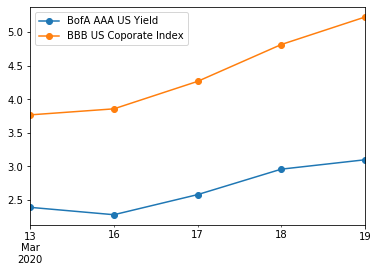

In [73]:
data[["BofA AAA US Yield","BBB US Coporate Index"]].loc["2020-03-13":"2020-03-19"].plot(marker ="o")

### 2020-03-18

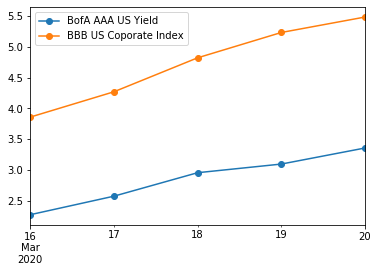

In [75]:
data[["BofA AAA US Yield","BBB US Coporate Index"]].loc["2020-03-16":"2020-03-20"].plot(marker ="o")

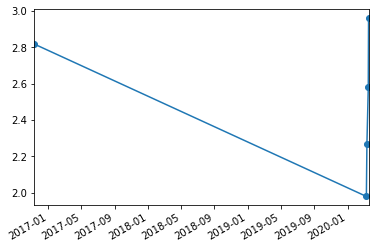

In [57]:
data[data["20 year MR daily returns"] * 100 > 9]["BofA AAA US Yield"].plot(marker = "o")

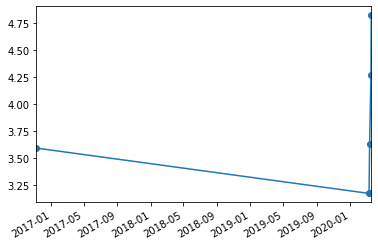

In [59]:
data[data["20 year MR daily returns"] * 100 > 9]["BBB US Coporate Index"].plot(marker = "o")

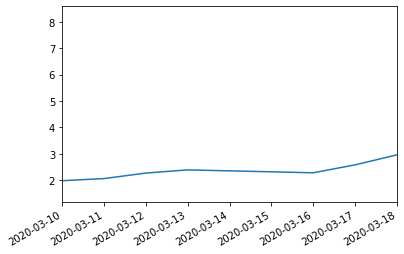

In [49]:
data["BofA AAA US Yield"].plot(xlim =("2020-3-10", "2020-03-18"))